In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
from sympy import Matrix

In [26]:
nn = 18
p = 0.43
G = nx.fast_gnp_random_graph(nn, p)

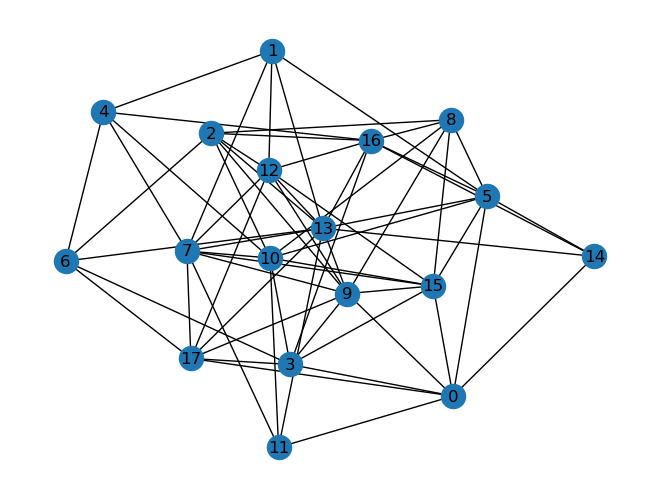

In [27]:
nx.draw(G, with_labels=True)

In [28]:
def TV(G, f):
    tv = []
    for node in G.nodes:
        node_tv = 0
        for neighbor in G.neighbors(node):
            node_tv += abs(f[neighbor]-f[node])
        if G.degree[node] != 0:
            tv.append(node_tv / G.degree[node])
        else:
            tv.append(0)
    return jnp.asarray(tv)

In [29]:
# Select a random subset of vertices
l = int(0.6 * nn)
v1 = set(np.random.randint(nn, size = l))
print(v1, len(v1))

{4, 6, 9, 10, 11, 14, 15, 16} 8


In [30]:
A = nx.adjacency_matrix(G).todense()

In [31]:
Matrix(A)

Matrix([
[0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0],
[1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1],
[0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1],
[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
[1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1],
[0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1],
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
[1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,

In [32]:
# The change of basis matrix is just the matrix with the 

P = nx.adjacency_matrix(nx.complete_graph(nn)).todense()
Pinv = np.linalg.inv(P)

In [33]:
Matrix((nn-1) * np.multiply(np.multiply(Pinv, A), P))

Matrix([
[                0,   0,                 0, 0.999999999999998,                 0, 0.999999999999998,                 0,                 0,                 0, 0.999999999999998,                 0, 0.999999999999998,                 0,   0, 1.0,               1.0,   0,               1.0],
[                0,   0,                 0,                 0, 0.999999999999996, 0.999999999999998,                 0,               1.0,                 0,                 0,                 0,                 0, 0.999999999999999, 1.0,   0,                 0,   0,                 0],
[                0,   0,                 0,                 0,                 0,                 0, 0.999999999999999,                 0, 0.999999999999999, 0.999999999999999, 0.999999999999998,                 0,               1.0, 1.0,   0,                 0, 1.0,                 0],
[              1.0,   0,                 0,                 0,                 0,                 0, 0.999999999999999,        

In [37]:
one_vec = np.ones(nn)
one_vec_new = np.dot(Pinv, one_vec)

In [39]:
print((nn-1)*one_vec_new)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
